# Dancourt, Oscar. (2014). Inflation Targeting in Peru: The Reasons for the Success

- ¿Cuál es la pregunta de investigación del artículo?
El artículo de Dancourt se centra en evaluar el papel de la política monetaria para lograr una estibilidad macroeconómica aunque durante periodos limitados. Por eso responde a ¿cómo se utilizaron los pprincipales instrumentos de la política monetaria peruana durante el período 2002-2013?

- ¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?
Las fortalezas del artículo residen en la forma lógica y deductiva en que se explica el impacto de los instrumentos de la política monetaria por el banco central, como (el tipo de interés y la intervención esterilizada, pues ello favorece la comprensión de la relación y efecto de estos instrumentos. Por ejemplo, señala la importancia de esterilizar la venta en dólares para mitigar el impacto recesivo de un choque externo mientras se mantiene la estabilidad de precios.
El mismo artículo apunta a algunas debilidades de este enfoque como la necesidad de probar esto en un contexto externo desfavorable más prolongado o ver si este régimen de política monetaria puede operar sin la tasa de interés de referencia como principal instrumento del banco central.


- ¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? (Si no puede encontrar ninguna contribución, pregúntese por qué el editor y los árbitros decidieron publicar el artículo).

La mayor contribución de los hallazgos de este artículo es que sirve para pensar en cómo puede actuar el banco  central, como el limitar los préstamos externos de los bancos comerciales , y que instrumentos debe priorizar en su política macroeconómica.

- ¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros artículos relacionados)
Respecto a la falsabilidad de el análisis de Dancourt, Edwards y Vergara (2004: 78) cuestionan la eficacia de los isntrumentos de política monetaria y señalan que una curva de rendimiento con tasas de interés como referencia pues induciría a la inestabilidad y especulación. Por ello, es importante considerar  otros análisis, y también es válido evaluar la falsabilidad de este análisis a otro contexto externo desfavorable como lo fue la cuarentena por la pandemia.

EDWARDS, Sebastián; VERGARA, Rodrigo. Política monetaria y estabilidad macroeconómica en Guatemala. Manuscrito no publicado, 2004.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

Código (10 puntos) - Revisen el tutorial de clase como guía.
A partir del siguiente sistema de ecuaciones que representan el modelo DA-OA

#### 1. Aggregate Demand $(DA)$:

Mathematically, the form of the aggregate demand function can be obtained from the IS and LM equations, eliminating $r$ and solving for $P$.

Considering, on the one hand, the equation of the IS Curve:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Where $ B_0 = C_o + I_o + G_o + X_o $ and $ B_1 = 1 - (b - m)(1 - t)$

And, on the other hand, the equation of the LM Curve:

$$  r = -\frac{1}{j}\frac{Mo^s}{P} + \frac{k}{j}Y $$

Eliminating $r$ and solving for $P$, we obtain:

$$  P = -\frac{h Mo^s}{-j B_o + (jB_1 + hk)Y} $$

Or, depending on income level $(Y)$:

$$  Y = \frac{jB_o}{jB_1 + hk} + (\frac{hMo^s}{jB_1 + hk})\frac{1}{P} $$


Now, considering the equilibrium equation in the money market

$$ Mo^s - P = kY - jr $$

$(r)$ is replaced, and the aggregate demand equation is obtained $(DA)$

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$


In [25]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 20  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

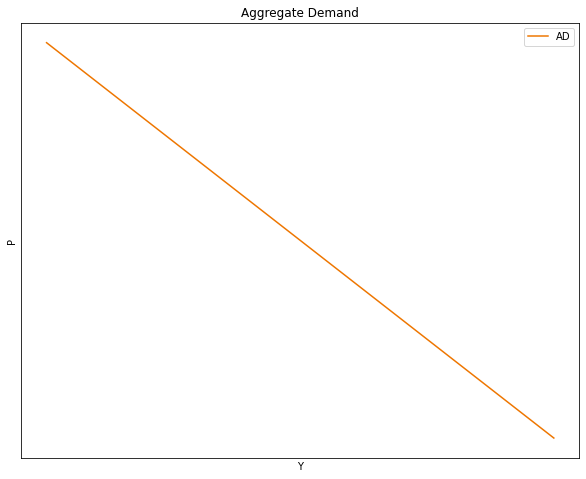

In [26]:
y_max = np.max(P_AD)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Demand", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AD, "#EE7600", label = "AD")  

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.legend()
plt.show()

#### - 2.Aggregate Supply (OA) in the short term:

The short term is a period in which the product $(Y)$ is located below or above its long term level or Potential Product $(\bar{Y})$.

Then, the short-term $OA$ curve can be represented with the following equation:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

- Where $(P)$ is the price level, $(P^e)$ the expected price and $\bar{Y}$ the potential product.

- Hallamos Ingreso ($Y^e$), en donde debemos igualar las ecuaciones 1 y 2:

$$ \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y = P^e + θ(Y - \bar{Y}) $$

$$ Y^e = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$


- Hallamos ($P^e$) de equilibrio, en donde solamente reemplazamos $Y^e$ en la ecuación de oferta agregada:

$$ P^e = P^e + θ( Y^{eq\_da\_oa} - \bar{Y} ) $$ 

$$ P^e = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$ 


<!-- - Para hallar P^e, despejamos la ecuación de $OA$ en función de Y:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

$$ Y = \frac{P - P^e - θ\bar{Y}}{θ} $$

Y reemplazamos $Y$ en la ecuación de $DA$:

$$ P^e = (\frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}) * (\frac{P - P^e - θ\bar{Y}}{θ}) $$ -->



- Hallamos tasa de interés ($r^e$), en donde solamente reemplazamos $P^e$ en la ecuación de tasa de interés de equilibrio del modelo IS-LM. 

- ($Y^e$) Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P)$$

- Tasa de interés de equilibrio en DA-OA
$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e)$$

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) ) $$
 

## Los valores de equilibrio de las tres variables endógenas son: 
1. ($Y^e$) Ingreso: $$ Y^e = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

2. ($r^e$) Tasa de interés: $$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*\\
[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) ) $$

3. Equilibrio ($P^e$) : $$ P^e = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$ 
o^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$

In [27]:
# Parámetros

Y_size = 100

Pe = 150   #precio esperado
θ = 10
_Y = 62   #producto potencial

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [28]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

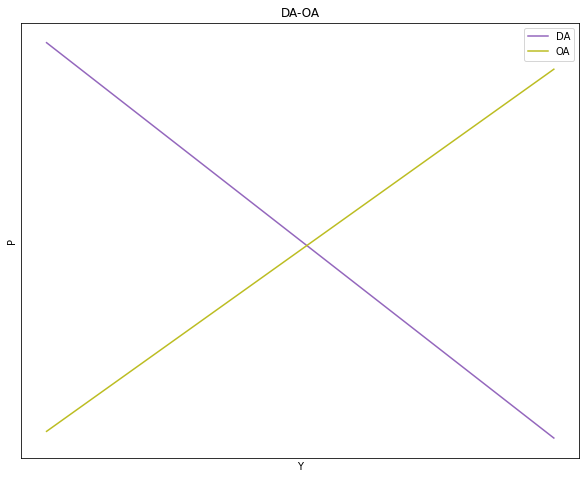

In [29]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "C4") #DA
ax.plot(Y, P_AS, label = "OA", color = "C8") #OA

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

Encuentre las ecuaciones de Ingreso y tasa de interés de equilibrio (Escriba paso a paso la derivación de estas ecuaciones). Grafique el equilibrio simultáneo en el modelo DA-OA

#### Equilibrium between Aggregate Demand and Aggregate Supply: DA-OA Model

In [30]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

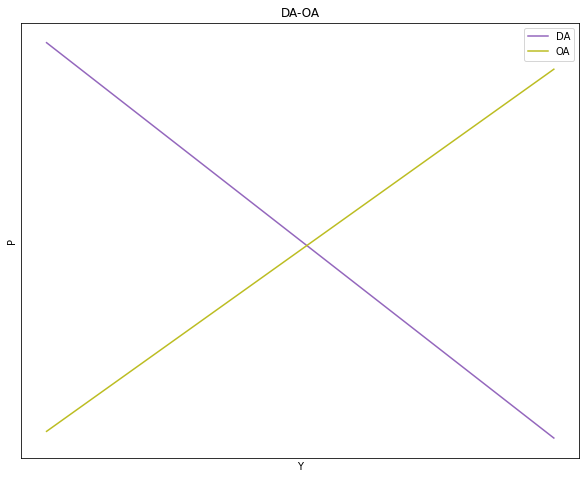

In [31]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "C4") #DA
ax.plot(Y, P_AS, label = "OA", color = "C8") #OA

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

# Estática comparativa.

- Analice los efectos sobre las variables endógenas P y r de una disminución del gasto fiscal. G<0. El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

#modelo IS-LM:

$$ G_0↓ → DA↓ → DA < Y → Y↓ $$

$$ Y↓ → M^d↓ → M^d < M^s → r↓ $$

#modelo DA-OA:#
$$ Y↓ → P↓ $$


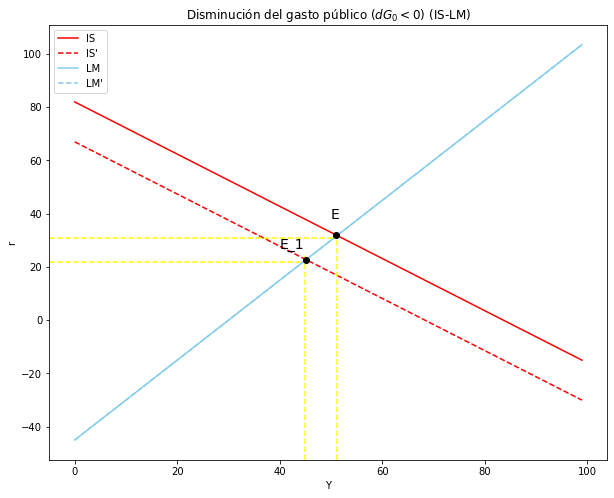

In [32]:
# IS
Y_size = 100 
b = 0.8                 
m = 0.4                 
t = 0.95                 
C0 = 15                 
I0 = 17                 
G0 = 40                 
X0 = 10                  
h =  1                  

Y = np.arange(Y_size)   
#----------------------
def r_is(b, m, t, C0, I0, G0, X0, h, Y):
    r_is = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_is

def Y_is(b, m, t, C0, I0, G0, X0, h, r):
    Y_is = (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_is

r = r_is(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------
# LM 
Y_size = 100

k = 12.93                
j = 8.62               
Ms = 9700           
P  = 25               

Y = np.arange(Y_size)
#-----------------------
def LM( k, j, Ms, P, Y):
    LM = (-Ms/P)/j + k/j*Y
    return LM

LM = LM( k, j, Ms, P, Y)
#-----------------------
# No hay variación en el mercado de dinero

Ms = 9700
def LM_Ms( k, j, Ms, P, Y):
    LM_Ms = (-Ms/P)/j + k/j*Y
    return LM_Ms

LM_Ms = LM_Ms( k, j, Ms, P, Y)
#-----------------------
# Variación en el gasto público

G0 = 25
def r_is_Go(b, m, t, C0, I0, G0, X0, h, Y):
    r_is_Go = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_is_Go

def Y_is_Go(b, m, t, C0, I0, G0, X0, h, r):
    Y_is_Go = (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_is_Go

r_is_Go = r_is_Go(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------------
y_max = np.max(r)
x_max = Y_is(b, m, t, C0, I0, G0, X0, h, 0)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Disminución del gasto público $(dG_0 < 0)$ (IS-LM)", xlabel= 'Y', ylabel= 'r')

ax.plot(Y, r, label = "IS", color = "red")
ax.plot(Y, r_is_Go, label = "IS'", linestyle='dashed', color = "red")
ax.plot(Y, LM, label="LM", color = "skyblue")  
ax.plot(Y, LM_Ms, label="LM'", linestyle='dashed', color = "skyblue")  

plt.axvline(x=51.2,  ymin= 0, ymax= 0.51, linestyle='dashed', color = 'yellow')
plt.axhline(y=31, xmin= 0, xmax= 0.51, linestyle='dashed', color = 'yellow')

plt.axhline(y=22, xmin= 0, xmax= 0.45, linestyle='dashed', color = 'yellow')
plt.axvline(x=45,  ymin= 0, ymax= 0.47, linestyle='dashed', color = 'yellow')
plt.plot(51, 32, marker="o", color="black")
plt.text(50,38, 'E', fontsize = 14, color = 'black')

plt.plot(45.16, 22.74, marker="o", color="black")
plt.text(40,27, 'E_1', fontsize = 14, color = "black")


ax.legend()
plt.show()

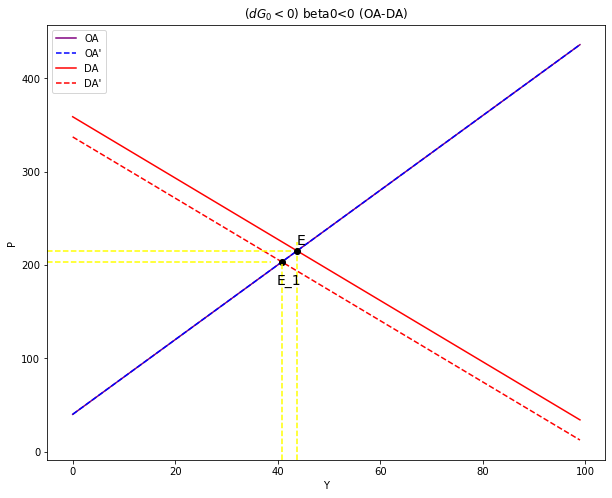

In [33]:
# OA
Y_size = 100 
Pe = 200
o = 4
Y_bar = 40

Y = np.arange(Y_size)   
#-----------------------
def OA(Pe, o, Y, Y_bar):
    OA = Pe+o*(Y-Y_bar)
    return OA

def OA_Y(Pe, Y_bar, o, P):
    OA_Y = Y_bar+P/o-Pe/o
    return OA_Y

OA = OA(Pe, o, Y, Y_bar)
#-----------------------
# DA
Y_size = 100

h = 1
Ms = 278.8
j = 0.8
beta1 = 1.5
k = 2.08
beta0 = 100

Y = np.arange(Y_size)
#-----------------------
def DA (h, Ms, j, beta1, k, beta0, Y):
    DA= ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA

DA = DA(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# Variación en el gasto público -> beta0 disminuye

beta0 = 73
def DA_B(h, Ms, j, beta1, k, beta0, Y):
    DA_B = ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA_B

DA_B = DA_B(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# No hay variación en OA

Pe = 200

def OA_p (Pe, o, Y, Y_bar):
    OA_p = Pe+o*(Y-Y_bar)
    return OA_p

def Y_OA_p(Pe, Y_bar, o, P):
    Y_OA_p = Y_bar+P/o-Pe/o
    return Y_OA_p

OA_p = OA_p(Pe, o, Y, Y_bar)
#-----------------------------
y_max = np.max(r)
x_max = OA_Y(Pe, Y_bar, o, P)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="$(dG_0 < 0)$ beta0<0 (OA-DA)", xlabel= 'Y', ylabel= 'P')

ax.plot(Y, OA, label = "OA", color = "purple")
ax.plot(Y, OA_p, label = "OA'", linestyle='dashed', color = "blue")
ax.plot(Y, DA, label="DA", color = "red")  
ax.plot(Y, DA_B, label="DA'", linestyle='dashed', color = "red")  

plt.axvline(x=43.75,  ymin= 0, ymax= 0.50, linestyle='dashed', color = 'yellow')
plt.axhline(y=215, xmin= 0, xmax= 0.4375, linestyle='dashed', color = 'yellow')


plt.plot(43.75, 215, marker="o", color="black")
plt.text(43.75,222, 'E', fontsize = 14, color = 'black')

plt.plot(40.78, 203.13, marker="o", color="black")
plt.text(39.78,179.13, 'E_1', fontsize = 14, color = "black")

plt.axhline(y=203.13, xmin= 0, xmax= 0.40, linestyle='dashed', color = 'yellow')
plt.axvline(x=40.78,  ymin= 0, ymax= 0.45, linestyle='dashed', color = 'yellow')
ax.legend()

plt.show()

- Analice los efectos sobre las variables endógenas P y r de una disminución de la masa monetaria. M<0. El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

- Intuición:

$$ Ms↓→Ms<Md→[r↑]→I↓→DA↓→DA<Y→[Y↓] $$

$$ Y↓→(Y-\bar Y)↓→[P↓] $$

- Matemáticamente:

$$ \dfrac{h*j}{\beta1*j+h*k}*\dfrac{\beta0*P0*j+ΔM_0^s*h}{h*P0*j}=ΔY $$

$$ \dfrac{h*j}{\beta1*j+h*k}*\dfrac{ΔM_0^s}{P0*j}=ΔY $$

$$ \dfrac{h}{\beta1*j+h*k}*\dfrac{ΔM_0^s}{P0}=ΔY $$

$$ \dfrac{h}{\beta1*j+h*k}*\dfrac{1}{P0}=\dfrac{ΔY}{ΔM_0^s}<0 $$

$$ \dfrac{k*\beta1}{j*\beta1+k*h}*\dfrac{\beta0*P0*k-\beta1*ΔM_0^s}{\beta1*P0*k}=Δr $$

$$ \dfrac{k*\beta1}{j*\beta1+k*h}*(-\dfrac{ΔM_0^s}{P0*k})=Δr $$

$$ \dfrac{\beta1}{j*\beta1+k*h}*(-\dfrac{ΔM_0^s}{P0})=Δr $$

$$ \dfrac{\beta1}{j*\beta1+k*h}*(-\dfrac{1}{P0})=\dfrac{Δr}{ΔM_0^s}>0 $$

$$ ΔP=P^e+\theta*(ΔY-\bar Y) $$

$$ ΔP=\theta*ΔY<0 $$

$$ ΔY<0 $$

$$ ∴ΔP<0 $$


GRÁFICAMENTE

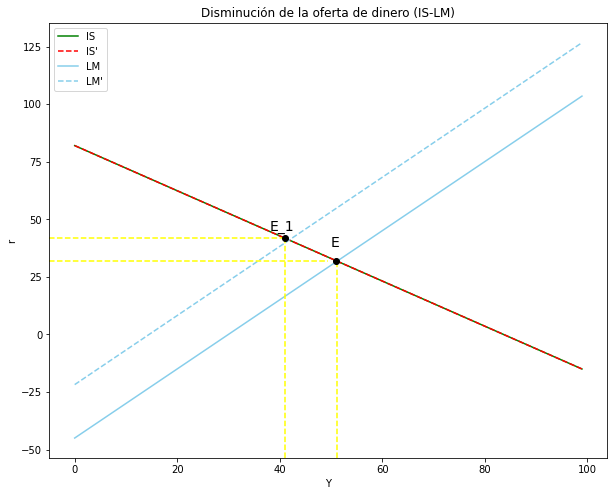

In [34]:
# IS
Y_size = 100 
b = 0.8                 
m = 0.4                 
t = 0.95                 
C0 = 15                 
I0 = 17                 
G0 = 40                 
X0 = 10                  
h =  1                  

Y = np.arange(Y_size)   
#-----------------------
def r_is(b, m, t, C0, I0, G0, X0, h, Y):
    r_is = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_is

def Y_is(b, m, t, C0, I0, G0, X0, h, r):
    Y_is= (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_is

r_is= r_is(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------
# LM 
Y_size = 100

k = 12.93                
j = 8.62               
Ms = 9700           
P  = 25               

Y = np.arange(Y_size)
#-----------------------
def LM( k, j, Ms, P, Y):
    LM = (-Ms/P)/j + k/j*Y
    return LM

LM= LM( k, j, Ms, P, Y)
#-----------------------
# disminución en la oferta de dinero

Ms = 4700
def LM_Ms( k, j, Ms, P, Y):
    LM_Ms = (-Ms/P)/j + k/j*Y
    return LM_Ms

LM_Ms = LM_Ms( k, j, Ms, P, Y)
#-----------------------
# se mantiene el mercado de bienes

G0 = 40
def r_is_Go(b, m, t, C0, I0, G0, X0, h, Y):
    r_is_Go = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_is_Go

def Y_is_Go(b, m, t, C0, I0, G0, X0, h, r):
    Y_is_Go = (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_is_Go

r_is_Go = r_is_Go(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------------
y_max = np.max(r)
x_max = Y_is(b, m, t, C0, I0, G0, X0, h, 0)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Disminución de la oferta de dinero (IS-LM)", xlabel= 'Y', ylabel= 'r')

ax.plot(Y, r_is, label = "IS", color = "green")
ax.plot(Y, r_is_Go, label = "IS'", linestyle='dashed', color = "red")
ax.plot(Y, LM, label="LM", color = "skyblue")  
ax.plot(Y, LM_Ms, label="LM'", linestyle='dashed', color = "skyblue")  

plt.axvline(x=51.21,  ymin= 0, ymax= 0.45, linestyle='dashed', color = 'yellow')
plt.axhline(y=31.81, xmin= 0, xmax= 0.50, linestyle='dashed', color = 'yellow')

plt.axhline(y=41.69, xmin= 0, xmax= 0.42, linestyle='dashed', color = 'yellow')
plt.axvline(x=41.13,  ymin= 0, ymax= 0.50, linestyle='dashed', color = 'yellow')
plt.plot(51, 32, marker="o", color="black")
plt.text(50,38, 'E', fontsize = 14, color = 'black')

plt.plot(41.13, 41.69, marker="o", color="black")
plt.text(38,45, 'E_1', fontsize = 14, color = "black")


ax.legend()
plt.show()

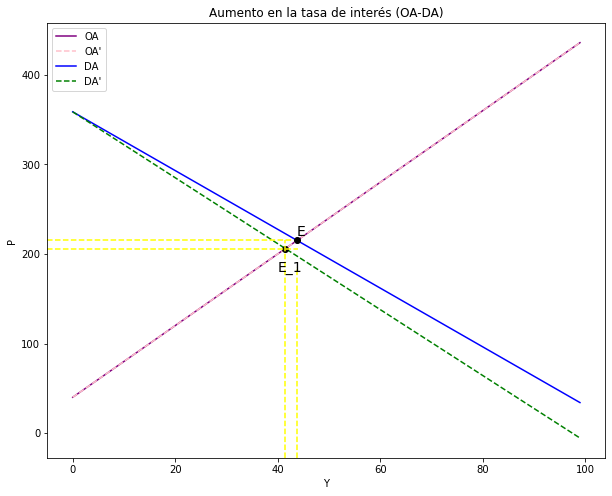

In [35]:
# OA
Y_size = 100 
Pe = 200
o = 4
Y_bar = 40

Y = np.arange(Y_size)   
#-----------------------
def OA(Pe, o, Y, Y_bar):
    OA = Pe+o*(Y-Y_bar)
    return OA

def Y_OA(Pe, Y_bar, o, P):
    Y_OA = Y_bar+P/o-Pe/o
    return Y_OA

OA= OA(Pe, o, Y, Y_bar)
#-----------------------
# DA
Y_size = 100

h = 1
Ms = 278.8
j = 0.8
beta1 = 1.5
k = 2.08
beta0 = 100

Y = np.arange(Y_size)
#-----------------------
def DA(h, Ms, j, beta1, k, beta0, Y):
    DA = ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA

DA = DA(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# Variación en la DA

beta1 = 2
def DA_b(h, Ms, j, beta1, k, beta0, Y):
    DA_b = ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA_b

DA_b = DA_b(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# No hay variación en la OA

Pe = 200

def OA_p(Pe, o, Y, Y_bar):
    OA_p= Pe+o*(Y-Y_bar)
    return OA_p

def Y_OA_p(Pe, Y_bar, o, P):
    Y_OA_p = Y_bar+P/o-Pe/o
    return Y_OA_p

OA_p = OA_p(Pe, o, Y, Y_bar)
#-----------------------------
y_max = np.max(r)
x_max = Y_OA(Pe, Y_bar, o, P)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aumento en la tasa de interés (OA-DA)", xlabel= 'Y', ylabel= 'P')

ax.plot(Y, OA, label = "OA", color = "purple")
ax.plot(Y, OA_p, label = "OA'", linestyle='dashed', color = "pink")
ax.plot(Y, DA, label="DA", color = "blue")  
ax.plot(Y, DA_b, label="DA'", linestyle='dashed', color = "green") 




plt.plot(43.79, 215.16, marker="o", color="black")
plt.text(43.79,220.16, 'E', fontsize = 14, color = 'black')
plt.axhline(y=215.16, xmin= 0, xmax= 0.4379, linestyle='dashed', color = 'yellow')
plt.axvline(x=43.79,  ymin= 0, ymax= 0.4379, linestyle='dashed', color = 'yellow')




plt.plot(41.51, 206.04, marker="o", color="black")
plt.text(40,180, 'E_1', fontsize = 14, color = "black")
plt.axvline(x=41.51,  ymin= 0, ymax= 0.50, linestyle='dashed', color = 'yellow')
plt.axhline(y=206.04, xmin= 0, xmax= 0.45, linestyle='dashed', color = 'yellow')


ax.legend()
plt.show()

- Analice los efectos sobre las variables endógenas P y r de un incremento de la tasa de impuestos.t>0 . El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).


- Intuición:

$$ t↑→(1-t)↓→C↓→DA↓→DA<Y→[Y↓]→Md↓→Md<Ms→[r↓] $$

$$ Y↓→(Y-\bar Y)↓→[P↓] $$

- Matemáticamente:

$$ Para simplificar "" t↑→\beta1↑, entonces: Δ\beta1>0 "" $$

$$ \dfrac{j*h}{Δ\beta1*j+k*h}*\dfrac{\beta0*P0*j+h*M_0^s}{j*h*P0}=ΔY $$

$$ \dfrac{1}{Δ\beta1*j+h*k}*\dfrac{\beta0*P0*j+h*M_0^s}{P0}=ΔY $$

$$ \dfrac{\beta0*j*P0}{P0*Δ\beta1*j+P0*k*h}+\dfrac{h*M_0^s}{P0*Δ\beta1*j+P0*k*h}=ΔY $$

$$ \dfrac{\beta0*P0*j+h*M_0^s}{P0*Δ\beta1*j+P0*h*k}=ΔY<0 $$

$$ \dfrac{k*Δ\beta1}{j*Δ\beta1+k*h}*\dfrac{\beta0*P0*k-Δ\beta1*M_0^s}{Δ\beta1*P0*k}=Δr $$

$$ \dfrac{k}{j*Δ\beta1+k*h}*\dfrac{\beta0*P0*k-Δ\beta1*M_0^s}{P0*k}=Δr $$

$$ \dfrac{k}{j*Δ\beta1+k*h}*\dfrac{\beta0*P0*k}{P0*k}+\dfrac{k}{j*Δ\beta1+k*h}*(-\dfrac{Δ\beta1*M_0^s}{P0*k})=Δr<0 $$

$$ ΔP=P^e+\theta*(ΔY-\bar Y) $$

$$ ΔP=\theta*ΔY<0 $$

$$ ΔY<0 $$

$$ ∴ΔP<0 $$

GRÁFICAMENTE

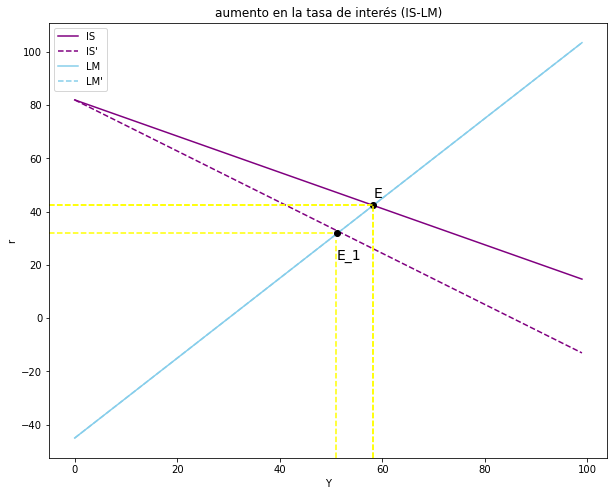

In [41]:
# IS
Y_size = 100 
b = 0.8                 
m = 0.4                 
t = 0.2                 
C0 = 15                 
I0 = 17                 
G0 = 40                 
X0 = 10                  
h =  1                

Y = np.arange(Y_size)   
#-----------------------
def r_is(b, m, t, C0, I0, G0, X0, h, Y):
    r_is = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_is

def Y_is(b, m, t, C0, I0, G0, X0, h, r):
    Y_is = (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_is

r_is = r_is(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------
# LM

Y_size = 100

k = 12.93                
j = 8.62               
Ms = 9700           
P  = 25               

Y = np.arange(Y_size)
#-----------------------
def LM( k, j, Ms, P, Y):
    LM = (-Ms/P)/j + k/j*Y
    return LM

LM = LM( k, j, Ms, P, Y)
#-----------------------
# No hay variación en el mercado de dinero

Ms = 9700
def LM_Ms( k, j, Ms, P, Y):
    LM_Ms = (-Ms/P)/j + k/j*Y
    return LM_Ms

LM_Ms = LM_Ms( k, j, Ms, P, Y)
#-----------------------
# Variación en la tasa de interés

t = 0.9
def r_IS_t(b, m, t, C0, I0, G0, X0, h, Y):
    r_IS_t = (C0 + I0 + G0 + X0 - Y * (1-(b-m)*(1-t)))/h
    return r_IS_t

def Y_IS_t(b, m, t, C0, I0, G0, X0, h, r):
    Y_IS = (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_IS

r_t = r_IS_t(b, m, t, C0, I0, G0, X0, h, Y)
#-----------------------------
y_max = np.max(r)
x_max = Y_is(b, m, t, C0, I0, G0, X0, h, 0)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="aumento en la tasa de interés (IS-LM)", xlabel= 'Y', ylabel= 'r')

ax.plot(Y, r_is, label = "IS", color = "purple")
ax.plot(Y, r_t, label = "IS'", linestyle='dashed', color = "purple")
ax.plot(Y, LM, label="LM", color = "skyblue")  
ax.plot(Y, LM_Ms, label="LM'", linestyle='dashed', color = "skyblue")  

plt.axvline(x=58.26,  ymin= 0, ymax= 0.5826, linestyle='dashed', color = 'yellow')
plt.axhline(y=42.38, xmin= 0, xmax= 0.5826, linestyle='dashed', color = 'yellow')


plt.plot(58.26, 42.38, marker="o", color="black")
plt.text(58.26,45.38, 'E', fontsize = 14, color = 'black')
plt.axvline(x=58.26,  ymin= 0, ymax= 0.5826, linestyle='dashed', color = 'yellow')
plt.axhline(y=42.38, xmin= 0, xmax= 0.5826, linestyle='dashed', color = 'yellow')

plt.plot(51.21, 32, marker="o", color="black")
plt.text(51.21,22, 'E_1', fontsize = 14, color = "black")
plt.axhline(y=32, xmin= 0, xmax= 0.51, linestyle='dashed', color = 'yellow')
plt.axvline(x=51,  ymin= 0, ymax= 0.50, linestyle='dashed', color = 'yellow')


ax.legend()
plt.show()

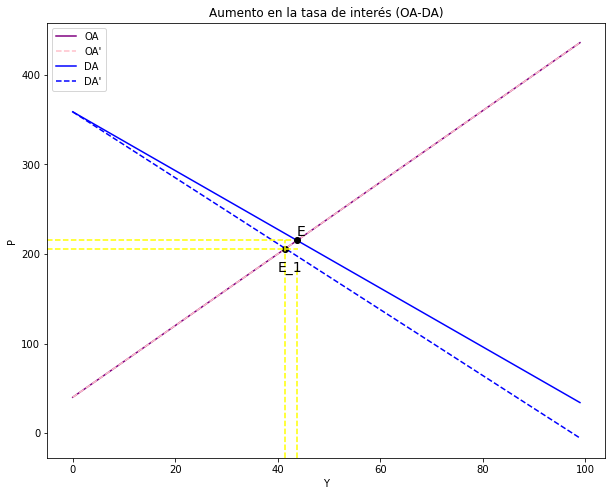

In [42]:
# OA
Y_size = 100 
Pe = 200
o = 4
Y_bar = 40

Y = np.arange(Y_size)   
#-----------------------
def OA(Pe, o, Y, Y_bar):
    OA = Pe+o*(Y-Y_bar)
    return OA

def Y_OA(Pe, Y_bar, o, P):
    Y_OA = Y_bar+P/o-Pe/o
    return Y_OA

OA= OA(Pe, o, Y, Y_bar)
#-----------------------
# DA
Y_size = 100

h = 1
Ms = 278.8
j = 0.8
beta1 = 1.5
k = 2.08
beta0 = 100

Y = np.arange(Y_size)
#-----------------------
def DA(h, Ms, j, beta1, k, beta0, Y):
    DA = ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA

DA = DA(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# Variación en la DA

beta1 = 2
def DA_b(h, Ms, j, beta1, k, beta0, Y):
    DA_b = ((h*Ms+j*beta0)/h)-(Y*(j*beta1+h*k)/h)
    return DA_b

DA_b = DA_b(h, Ms, j, beta1, k, beta0, Y)
#-----------------------
# No hay variación en la OA

Pe = 200

def OA_p(Pe, o, Y, Y_bar):
    OA_p= Pe+o*(Y-Y_bar)
    return OA_p

def Y_OA_p(Pe, Y_bar, o, P):
    Y_OA_p = Y_bar+P/o-Pe/o
    return Y_OA_p

OA_p = OA_p(Pe, o, Y, Y_bar)
#-----------------------------
y_max = np.max(r)
x_max = Y_OA(Pe, Y_bar, o, P)

v = [0, x_max, 0, y_max]                        
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aumento en la tasa de interés (OA-DA)", xlabel= 'Y', ylabel= 'P')

ax.plot(Y, OA, label = "OA", color = "purple")
ax.plot(Y, OA_p, label = "OA'", linestyle='dashed', color = "pink")
ax.plot(Y, DA, label="DA", color = "blue")  
ax.plot(Y, DA_b, label="DA'", linestyle='dashed', color = "blue") 




plt.plot(43.79, 215.16, marker="o", color="black")
plt.text(43.79,220.16, 'E', fontsize = 14, color = 'black')
plt.axhline(y=215.16, xmin= 0, xmax= 0.4379, linestyle='dashed', color = 'yellow')
plt.axvline(x=43.79,  ymin= 0, ymax= 0.4379, linestyle='dashed', color = 'yellow')




plt.plot(41.51, 206.04, marker="o", color="black")
plt.text(40,180, 'E_1', fontsize = 14, color = "black")
plt.axvline(x=41.51,  ymin= 0, ymax= 0.50, linestyle='dashed', color = 'yellow')
plt.axhline(y=206.04, xmin= 0, xmax= 0.45, linestyle='dashed', color = 'yellow')


ax.legend()
plt.show()